# Implementing Dirac...
This is a SageMath script.  Demonstrates a few things:
* Demonstrate how Dirac's 4x4 $\gamma$ matrices are composed from the Pauli matrices, and have interesting anticommute properties
* Code the Dirac equation symbollicaly.
* Code a plane wave function known to be a solution to Dirac
* Demonstrate this is so
* Code transformation of a wave function between spin-up / spin-down and demonstrate that both (and their superposition) satisfy Dirac
* ToDo: As above for matter / antimatter.


In [51]:
import numpy as np

## Looking at Pauli matrices

In [52]:
one = matrix([[1,0],[0,1]])
zero = matrix([[0,0], [0,0]])
p1 = matrix([[0,1],[1,0]])
p2 = matrix([[0,-1j],[1j,0]])
p3 = matrix([[1,0],[0,-1]])

In [53]:
def pauli(i):
    d = {1: p1, 2: p2, 3: p3}
    return d[i]
show(pauli(1), pauli(2) ,pauli(3))

[0 1]
[1 0] [  0.000000000000000 -1.00000000000000*I]
[ 1.00000000000000*I   0.000000000000000] [ 1  0]
[ 0 -1]

## Compose the four gamma matrices

In [54]:
def compose(a,b,c,d):
    # a b
    # c d
    return matrix(
        np.vstack([
            np.hstack([a,b]),
            np.hstack([c,d])
    ]))
show(compose(one, p1, p2, p3))

[   1.0    0.0    0.0    1.0]
[   0.0    1.0    1.0    0.0]
[   0.0 -1.0*I    1.0    0.0]
[ 1.0*I    0.0    0.0   -1.0]

In [55]:
def gamma(i):
    # The four gamma matrices
    if i == 0:
        return compose(one, zero, zero, -one)
    else:
        return compose(zero, pauli(i), -pauli(i), zero)
show(gamma(0), gamma(1), gamma(2), gamma(3))

[ 1  0  0  0]
[ 0  1  0  0]
[ 0  0 -1  0]
[ 0  0  0 -1] [ 0  0  0  1]
[ 0  0  1  0]
[ 0 -1  0  0]
[-1  0  0  0] [   0.0    0.0    0.0 -1.0*I]
[   0.0    0.0  1.0*I    0.0]
[   0.0  1.0*I    0.0    0.0]
[-1.0*I    0.0    0.0    0.0] [ 0  0  1  0]
[ 0  0  0 -1]
[-1  0  0  0]
[ 0  1  0  0]

## Check the anticommuator properties of the gamma matrices

In [56]:
def anticom(a,b):
    return a*b + b*a

In [57]:
rows = [[anticom(gamma(i), gamma(j)) for i in range(4)] for j in range(4)]
show(table(rows))

,,,
,,,
,,,
,,,


Now show that these gamma matrices have "square root" properties

In [58]:
# Check for a random 4-vector
r = vector([1,6,2,4])
r

(1, 6, 2, 4)

In [59]:
z = sum(r[i] * gamma(i) for i in range(4))
z

[         1.0          0.0          4.0  6.0 - 2.0*I]
[         0.0          1.0  6.0 + 2.0*I         -4.0]
[        -4.0 -6.0 + 2.0*I         -1.0          0.0]
[-6.0 - 2.0*I          4.0          0.0         -1.0]

In [60]:
# But when we square it we find the off-diagonal components are zero
z*z

[-55.0   0.0   0.0   0.0]
[  0.0 -55.0   0.0   0.0]
[  0.0   0.0 -55.0   0.0]
[  0.0   0.0   0.0 -55.0]

## Defining a 4-spinor wave function
This is a known solution to the Dirac equation which we will later check; actually deriving this solution would be a further challange.  It would be nice to model this as an explicit function of (t, r).  However, SageMath doesn't allow functions returning a vector, so we have to model as a simple variable, dependent on the variable t and r.  Not so clear....

In [73]:
t = var('t')
m = var('m')
x,y,z = var("x,y,z")
r = vector([x,y,z])

def generate_dirac_psi(p, E, m):
    # Generate a 4-spinor state for a matter particle of momentum p, total energy E, mass m, spin up.
    # For this to satisfy the Dirac Equation, we requre E^2 = p^2 + m^2
    assert (E^2 == p.dot_product(p) + m^2)
    
    U = sqrt((E+m) / (2*E)) * vector ([
            1, 
            0, 
            p[2]/(E+m), 
            (p[0] + i * p[1])/(E+m)
        ])
    return U * exp(i*(p.dot_product(r) - E*t))

In [74]:
# Generate a specific wave function to test
M=4  # Mass of our particle
dirac_psi = generate_dirac_psi(p=vector([3,0,0]), E=5, m=M)
show(dirac_psi)
# (Pitty I can't factor out the common exponent factor for better clarity)

(3*sqrt(1/10)*e^(-5*I*t + 3*I*x), 0, 0, sqrt(1/10)*e^(-5*I*t + 3*I*x))

## The Dirac differential operator
This implements the key operator $i \hbar \gamma^\mu \partial_\mu$. (But we use $\hbar=1$)

Equivalent to $i \hbar \sum_{i=0}^{i=3} \gamma(i) \frac{\partial}{\partial X^i}$ where

$\gamma(i)$ is one of the four gamma matrices (composed from Pauli matrices) defined earlier, and 

$X^i$ is the $i$th spacetime coordinate : $X^0 = t, (X^1, X^2, X^3) = (x, y, z) = r$.

In [75]:
# Apply the Dirac differentrial operator to the given wave function
def dirac_operator(psi):
    X = vector([t,r[0], r[1], r[2]])
    result = i * sum(gamma(q) * diff(psi, X[q]) for q in range(4))
    return result

## The Dirac equation

$(i \hbar \gamma^\mu \partial_\mu - m) \Psi = 0$, or

$(i \hbar \gamma^\mu \partial_\mu \Psi - m \Psi = 0$

Below we evaluate the LHS of this equation, using our carefully constructed wave function.

In [64]:
def apply_dirac_and_check(psi):
    show("Psi:", psi)
    dirac_lhs = dirac_operator(psi) - m * psi
    show("Dirac LHS:", dirac_lhs)
    show(f"Dirac LHS (m={M}):", dirac_lhs.substitute(m=M))
    if dirac_lhs.substitute(m=M) == vector([0,0,0,0]):
        print("Looks like Dirac was right after all!")
    else:
        print("Dirac was wrong (can't possibly be me!)")  

In [65]:
apply_dirac_and_check(dirac_psi)

'Psi:' (3*sqrt(1/10)*e^(-5*I*t + 3*I*x), 0, 0, sqrt(1/10)*e^(-5*I*t + 3*I*x))

'Dirac LHS:' (-3*sqrt(1/10)*m*e^(-5*I*t + 3*I*x) + 12*sqrt(1/10)*e^(-5*I*t + 3*I*x), 0, 0, -sqrt(1/10)*m*e^(-5*I*t + 3*I*x) + 4*sqrt(1/10)*e^(-5*I*t + 3*I*x))

'Dirac LHS (m=4):' (0, 0, 0, 0)

Looks like Dirac was right after all!


In [66]:
# This interactive graphic doesn't show in the downloaded html, unfortunately.
def show_psi(psi):
    @interact
    def _(T=slider(np.linspace(0, 4, 21)), Select=[0,1,2,3]):
        pt = contour_plot(real_part(psi[Select].substitute(t=T, z=0)), (x, -5, 5), (y,-5, 5), axes_labels=['x', 'y'])
        show(pt)

show_psi(dirac_psi)

Interactive function <function show_psi.<locals>._ at 0x7f2ba3cf2820> with 2 widgets
  T: SelectionSlider(value=0.0, options=(0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003, 4.0), description='T')
  Select: Dropdown(value=0, options=(0, 1, 2, 3), description='Select')

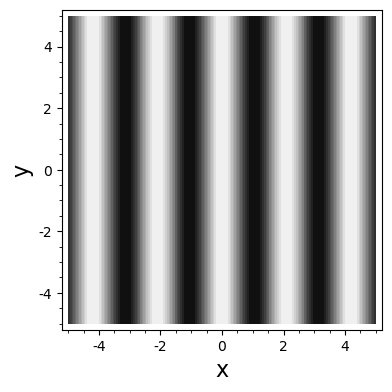

In [77]:
contour_plot(real_part(dirac_psi[0].substitute(t=0, z=0)), (x, -5, 5), (y,-5, 5), axes_labels=['x', 'y'])

## Transforming spinors - spin up <-> spin down
Transforming between spin up and spin down invoves applying a 180' rotation to each to each half of the 4-spinor.
We need to rotate about the Y axis, so that is $\alpha_y$, which is pauli(2) as defined above.

In [67]:
def opposite_spin(psi):
    Ry = pauli(1)
    rotator = compose(Ry, zero, zero, Ry)
    return rotator * psi

In [68]:
show("Up:", dirac_psi)
dirac_down_psi = opposite_spin(dirac_psi)
show("Down:", dirac_down_psi)
dirac_up_psi = opposite_spin(dirac_down_psi)
show("Up:", dirac_up_psi)

assert dirac_up_psi == dirac_psi

'Up:' (3*sqrt(1/10)*e^(-5*I*t + 3*I*x), 0, 0, sqrt(1/10)*e^(-5*I*t + 3*I*x))

'Down:' (0, 3*sqrt(1/10)*e^(-5*I*t + 3*I*x), sqrt(1/10)*e^(-5*I*t + 3*I*x), 0)

'Up:' (3*sqrt(1/10)*e^(-5*I*t + 3*I*x), 0, 0, sqrt(1/10)*e^(-5*I*t + 3*I*x))

In [69]:
apply_dirac_and_check(dirac_down_psi)

'Psi:' (0, 3*sqrt(1/10)*e^(-5*I*t + 3*I*x), sqrt(1/10)*e^(-5*I*t + 3*I*x), 0)

'Dirac LHS:' (0, -3*sqrt(1/10)*m*e^(-5*I*t + 3*I*x) + 12*sqrt(1/10)*e^(-5*I*t + 3*I*x), -sqrt(1/10)*m*e^(-5*I*t + 3*I*x) + 4*sqrt(1/10)*e^(-5*I*t + 3*I*x), 0)

'Dirac LHS (m=4):' (0, 0, 0, 0)

Looks like Dirac was right after all!


In [70]:
apply_dirac_and_check(dirac_down_psi + dirac_up_psi)

'Psi:' (3*sqrt(1/10)*e^(-5*I*t + 3*I*x), 3*sqrt(1/10)*e^(-5*I*t + 3*I*x), sqrt(1/10)*e^(-5*I*t + 3*I*x), sqrt(1/10)*e^(-5*I*t + 3*I*x))

'Dirac LHS:' (-3*sqrt(1/10)*m*e^(-5*I*t + 3*I*x) + 12*sqrt(1/10)*e^(-5*I*t + 3*I*x), -3*sqrt(1/10)*m*e^(-5*I*t + 3*I*x) + 12*sqrt(1/10)*e^(-5*I*t + 3*I*x), -sqrt(1/10)*m*e^(-5*I*t + 3*I*x) + 4*sqrt(1/10)*e^(-5*I*t + 3*I*x), -sqrt(1/10)*m*e^(-5*I*t + 3*I*x) + 4*sqrt(1/10)*e^(-5*I*t + 3*I*x))

'Dirac LHS (m=4):' (0, 0, 0, 0)

Looks like Dirac was right after all!


In [71]:
# Lets look at a superposition of spin up and down wave functions
show_psi(dirac_down_psi + dirac_up_psi)

Interactive function <function show_psi.<locals>._ at 0x7f2ba38b4ca0> with 2 widgets
  T: SelectionSlider(value=0.0, options=(0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003, 4.0), description='T')
  Select: Dropdown(value=0, options=(0, 1, 2, 3), description='Select')

In [72]:
# ToDo: transform between matter / anti-matter.